In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')
df.shape

(100, 4)


# Steps
```
0. Preprocess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model
```



In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


# Remove unnamed features

In [4]:
df = df.iloc[:, 1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# Data visulizations

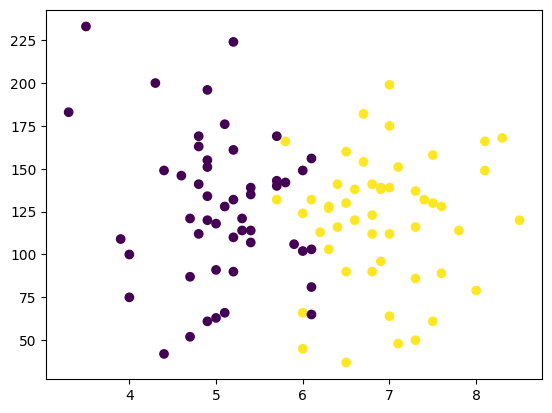

In [6]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

# Separte Features and Label

In [18]:
X = df.iloc[:, :2]
y = df.iloc[:, -1]

In [19]:
X.shape, y.shape

((100, 2), (100,))

# Model Test and Model Train

```
90% data is Train Data
10% data is Test data
```

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [21]:
X_train

,cgpa,iq
51,4.8,141.0
24,4.7,121.0
92,5.2,110.0
68,4.0,75.0
55,7.8,114.0
...,...,...
29,7.0,112.0
46,5.3,114.0
31,3.9,109.0
80,4.9,196.0


In [22]:
y_train

,placement
51,0
24,0
92,0
68,0
55,1
...,...
29,1
46,0
31,0
80,0


In [23]:
X_train

,cgpa,iq
51,4.8,141.0
24,4.7,121.0
92,5.2,110.0
68,4.0,75.0
55,7.8,114.0
...,...,...
29,7.0,112.0
46,5.3,114.0
31,3.9,109.0
80,4.9,196.0


In [24]:
y_test

,placement
52,1
60,1
1,0
37,1
78,0
95,0
65,1
57,1
23,0
94,0


# Scale data

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train

array([[-1.04287332e+00,  4.58596534e-01],
       [-1.13243305e+00, -5.19005354e-02],
       [-6.84634394e-01, -3.32673924e-01],
       [-1.75935118e+00, -1.22604380e+00],
       [ 1.64391863e+00, -2.30574510e-01],
       [ 3.90082387e-01,  4.58596534e-01],
       [ 9.27440778e-01,  4.07546827e-01],
       [-6.84634394e-01, -8.43170994e-01],
       [ 2.09171729e+00,  1.14776758e+00],
       [ 7.48321315e-01, -2.81624217e-01],
       [-6.84634394e-01,  9.69093604e-01],
       [ 1.21403192e-01, -1.48129233e+00],
       [ 1.46479917e+00,  1.26773439e-01],
       [-2.20714983e+00,  2.80688306e+00],
       [ 6.58761583e-01,  1.50511553e+00],
       [ 9.27440778e-01,  1.93903804e+00],
       [ 1.19611997e+00, -1.86416513e+00],
       [-2.36835735e-01,  1.17329243e+00],
       [-2.36835735e-01,  5.09646241e-01],
       [-9.53313590e-01,  7.13845069e-01],
       [ 1.01700051e+00, -1.91521484e+00],
       [ 7.48321315e-01, -8.50828450e-04],
       [-5.05514931e-01,  3.05447413e-01],
       [-7.

In [33]:
X_test

array([[-0.91756311, -1.63274236],
       [ 1.17750699, -1.91028613],
       [ 1.35209617,  0.10821404],
       [ 0.12997194, -1.12811732],
       [ 0.12997194,  0.76422659],
       [-0.48109017,  0.33529531],
       [ 0.91562323, -1.5570486 ],
       [ 1.43939075,  0.05775153],
       [ 0.74103405, -0.06840473],
       [-1.0048577 , -0.3459485 ]])

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
clf = LogisticRegression()

In [39]:
clf.fit(X_train,y_train)

LogisticRegression()

In [40]:
y_pred = clf.predict(X_test)

In [41]:
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0])

# Accuracy Test

In [42]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test,y_pred)*100

80.0

# Check Logistic Regression Line

In [45]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

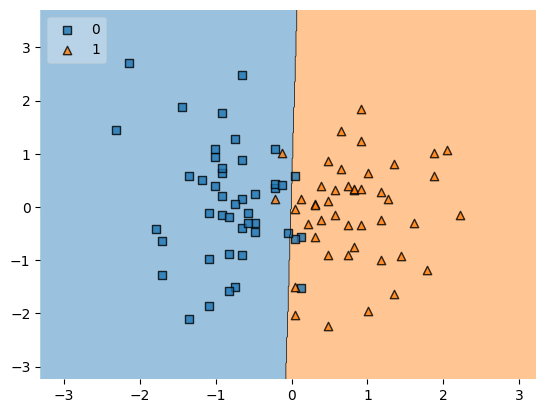

In [46]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

# Export data

In [48]:
import pickle

In [49]:
pickle.dump(clf,open('model.pkl','wb'))